In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [3]:
%matplotlib inline

In [4]:
# Reading the data
dataset = pd.read_csv('bankloans.csv')
dataset.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [5]:
# Checking for null values
dataset.isnull().sum()

# Checking value counts
dataset.value_counts()

# Dropping null values
dataset = dataset.dropna()

<Axes: xlabel='age', ylabel='income'>

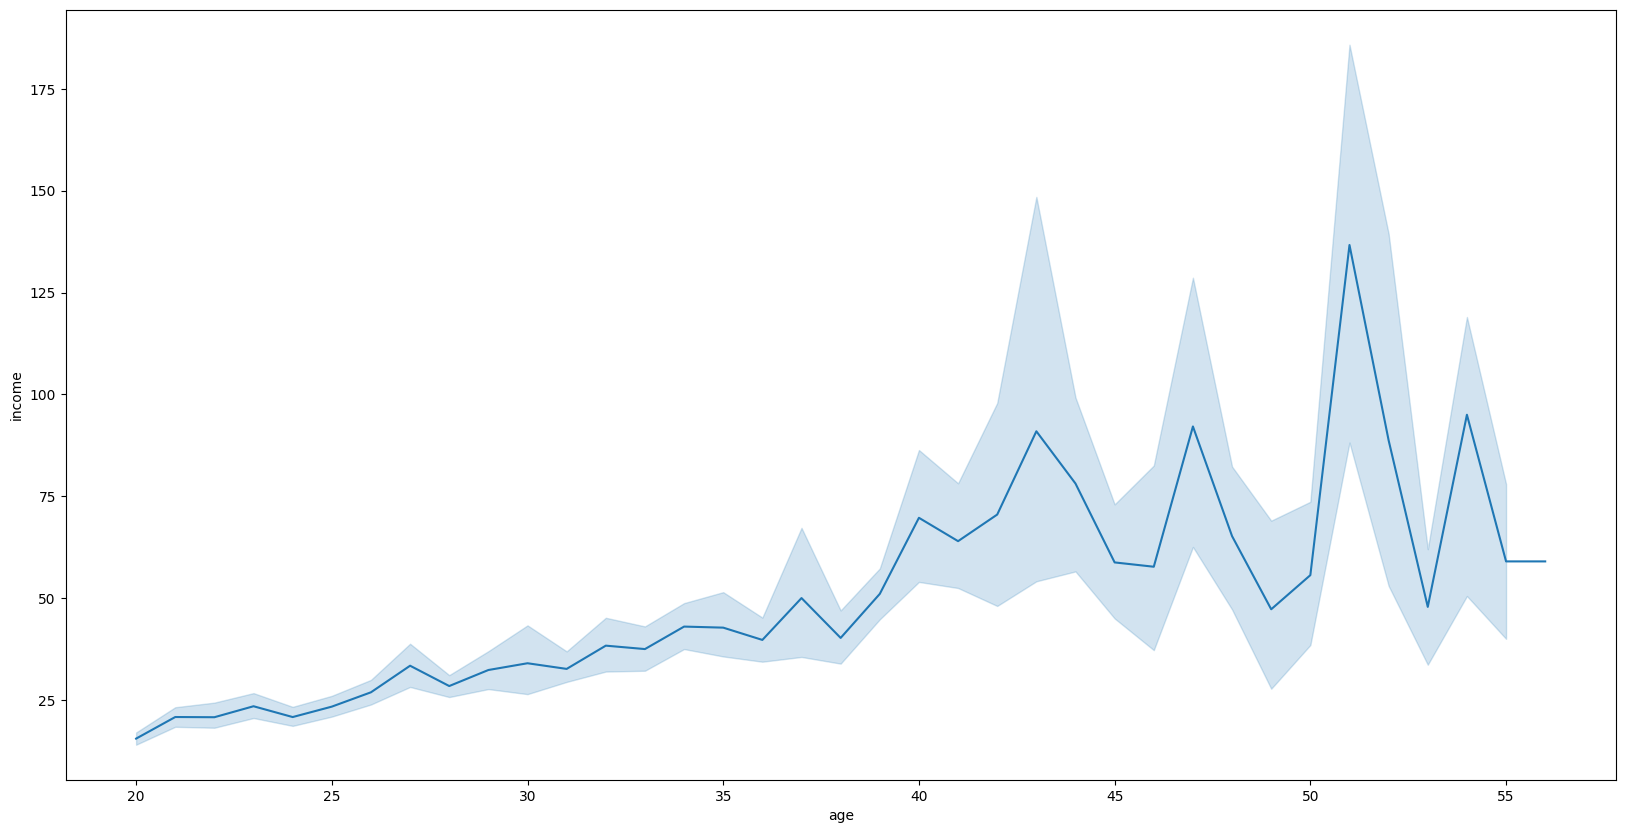

In [6]:
# Visualizing the relationship between age and income
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='age', y='income', data=dataset, ax=ax)

<Axes: xlabel='age', ylabel='debtinc'>

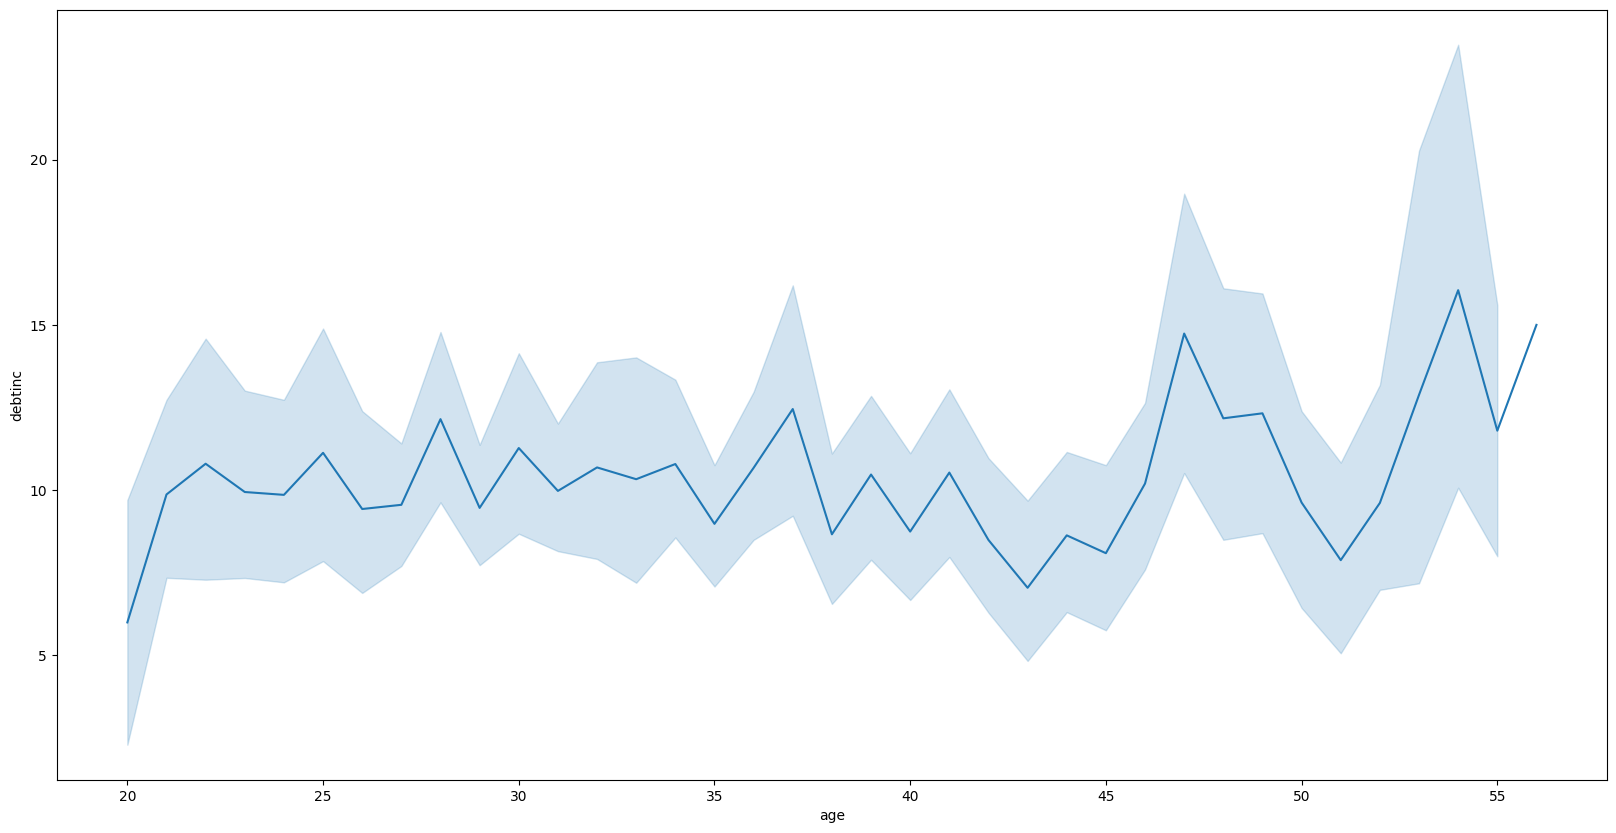

In [7]:
# Visualizing the relationship between age and debt-to-income ratio
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='age', y='debtinc', data=dataset, ax=ax)

In [8]:
# Checking the distribution of the target variable
dataset['default'].value_counts()

# Separating features and target
X = dataset.drop(['default'], axis=1)
y = dataset['default']

In [9]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)
rf_cross_val_score = cross_val_score(estimator=rf_model, X=X_train, y=y_train, cv=10)
rf_cross_val_score.mean()

0.7892857142857143

In [11]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_score = svm_model.score(X_test, y_test)

In [12]:
# Hyperparameter tuning for SVM
svm_grid_search = GridSearchCV(svm_model, {
    'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
    'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
    'kernel': ['rbf', 'linear']
}, scoring='accuracy', cv=10)

svm_grid_search.fit(X_train, y_train)
best_params = svm_grid_search.best_params_

In [13]:
# Fitting SVM with best hyperparameters
tuned_svm_model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])
tuned_svm_model.fit(X_train, y_train)
tuned_svm_score = tuned_svm_model.score(X_test, y_test)

In [14]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_score = lr_model.score(X_test, y_test)

In [15]:
# Predictions and confusion matrix
y_pred = lr_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)


<Axes: >

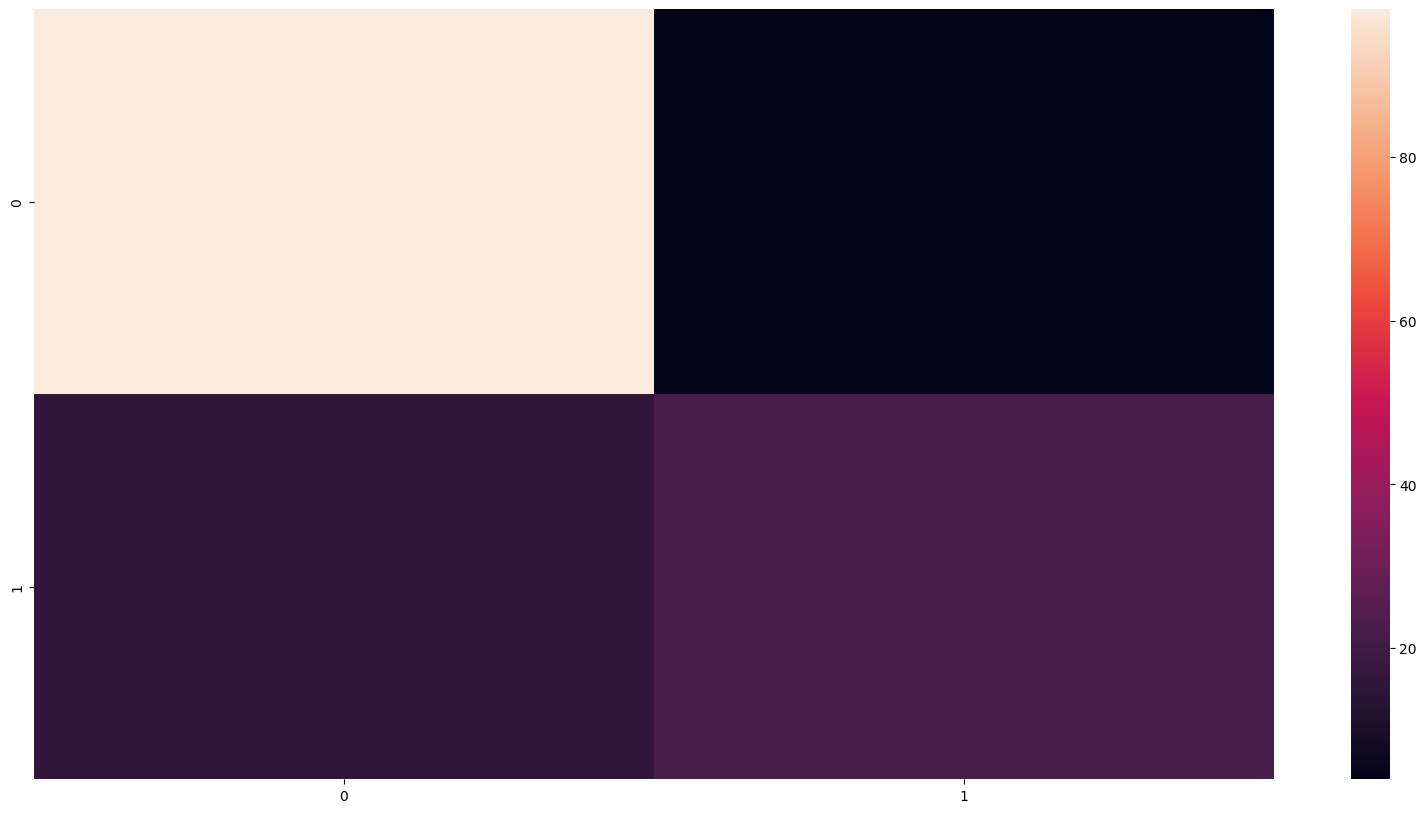

In [16]:
# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(conf_matrix, ax=ax)